<a href="https://colab.research.google.com/github/popolyh0824/0314_AG/blob/main/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. MNIST 데이터셋 로드 및 전처리
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# CNN 입력 형태에 맞게 데이터 차원 추가 (28x28 → 28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# 2. CNN 모델 생성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 합성곱층
    layers.MaxPooling2D((2, 2)),  # 풀링층
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),  # 1D 벡터로 변환
    layers.Dense(64, activation='relu'),  # 완전연결층
    layers.Dense(10, activation='softmax')  # 출력층 (0~9 숫자 분류)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.8924 - loss: 0.3476 - val_accuracy: 0.9831 - val_loss: 0.0490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 30ms/step - accuracy: 0.9851 - loss: 0.0472 - val_accuracy: 0.9837 - val_loss: 0.0492
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9901 - loss: 0.0318 - val_accuracy: 0.9866 - val_loss: 0.0410
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9920 - loss: 0.0255 - val_accuracy: 0.9862 - val_loss: 0.0409
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9938 - loss: 0.0175 - val_accuracy: 0.9918 - val_loss: 0.0293


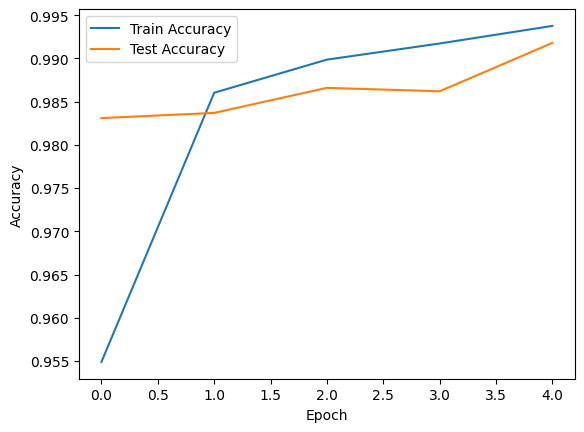

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0381

Test accuracy: 0.9918


In [4]:
# 5. 학습 결과 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 6. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 7. MNIST 데이터셋에서 랜덤 이미지 하나 선택
random_idx = np.random.randint(0, len(x_test))  # x_test에서 랜덤 인덱스 선택
random_image = x_test[random_idx]  # 랜덤 이미지
true_label = y_test[random_idx]  # 실제 레이블

# 8. 모델로 예측
predicted_label = model.predict(np.expand_dims(random_image, axis=0))  # 예측
predicted_class = np.argmax(predicted_label)  # 예측된 클래스 (0~9)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


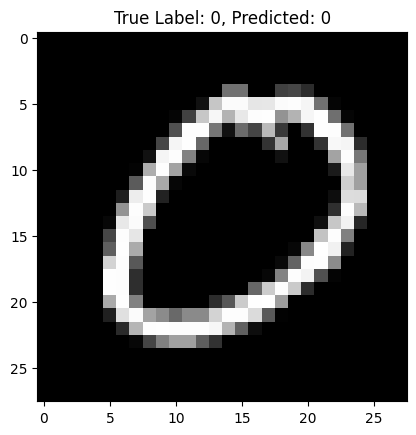

True Label: 0
Predicted Label: 0


In [6]:
# 9. 이미지 출력
plt.imshow(random_image.squeeze(), cmap='gray')  # 이미지를 그레이스케일로 출력
plt.title(f"True Label: {true_label}, Predicted: {predicted_class}")  # 실제 레이블과 예측된 레이블 출력
plt.show()

# 10. 예측 결과 출력
print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_class}")